# Udemy Course Enrolment Prediction using Linear Regression
### Minal Dhansukhlal - 300318615
### CSIS 3290: Fundamentals of Machine Learning

## 1. Library import and data loading

In [1]:
# Imported all the necessary libraries required in feature enginering, scaling and transformation. 
# Imported libraries requred for plotting charts and all libraries required for linear regression
import numpy as np
import pandas as pd
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Reading cleaned data from Lab2 and saving it in df
df = pd.read_csv('Dataset/Lab02_MDh18615_prepared.csv')
# Getting a peak of the data
df.head()

,avg_rating,number_ratings,enrollment,last_updated,lectures,duration,price2,discount,inst_rating,inst_review,inst_student,inst_course,cat_design,cat_development,cat_it software,cat_personal hobby
0,4.5,2826.0,14269.0,20.833333,41.0,7.133333,19.99,88,4.5,11922.0,53659.0,10.0,0,0,0,0
1,3.3,320.0,2088.0,17.166667,72.0,4.133333,16.99,90,3.3,320.0,4012.0,3.0,0,0,0,0
2,4.4,991.0,3563.0,20.666667,91.0,5.233333,28.99,77,4.4,2193.0,7422.0,6.0,0,0,0,0
3,4.2,681.0,1932.0,20.833333,57.0,5.050000,16.99,64,4.3,25989.0,242683.0,43.0,0,0,1,0
4,4.3,1939.0,14048.0,13.333333,142.0,10.766667,20.99,55,4.5,25581.0,113480.0,12.0,0,0,0,0


In [3]:
# Data types of the variables
df.dtypes

avg_rating            float64
number_ratings        float64
enrollment            float64
last_updated          float64
lectures              float64
duration              float64
price2                float64
discount                int64
inst_rating           float64
inst_review           float64
inst_student          float64
inst_course           float64
cat_design              int64
cat_development         int64
cat_it software         int64
cat_personal hobby      int64
dtype: object

In [4]:
# The shape of data shows that we have 1401 rows and 16 columns in the file
df.shape

(1401, 16)

In [5]:
# Checking data for null values
df.isnull().sum()

avg_rating            0
number_ratings        0
enrollment            0
last_updated          0
lectures              0
duration              0
price2                0
discount              0
inst_rating           0
inst_review           0
inst_student          0
inst_course           0
cat_design            0
cat_development       0
cat_it software       0
cat_personal hobby    0
dtype: int64

## 2. Exploratory Data Analysis

### 2.1 Summary Statistics

In [6]:
# Getting summary statistics on the data
df.describe()

,avg_rating,number_ratings,enrollment,last_updated,lectures,duration,price2,discount,inst_rating,inst_review,inst_student,inst_course,cat_design,cat_development,cat_it software,cat_personal hobby
count,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000
mean,4.377873,1455.690935,8671.201285,19.823995,100.961456,11.287973,24.011413,78.675232,4.380728,10819.456103,59543.408280,15.960029,0.081370,0.234118,0.245539,0.089222
std,0.291025,1344.462354,7911.734248,1.358369,93.692750,12.820458,22.134868,16.310234,0.245444,15120.556195,67557.915607,26.746292,0.273501,0.423598,0.430560,0.285166
min,2.100000,17.000000,36.000000,11.666667,5.000000,0.500000,16.990000,30.000000,2.600000,31.000000,55.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4.300000,479.000000,2814.000000,19.333333,43.000000,4.100000,16.990000,74.000000,4.300000,1578.000000,9589.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,4.400000,958.000000,5992.000000,20.416667,71.000000,7.300000,17.990000,86.000000,4.400000,4868.000000,32830.000000,9.000000,0.000000,0.000000,0.000000,0.000000
75%,4.600000,1974.000000,12645.000000,20.750000,123.000000,13.783333,21.990000,89.000000,4.500000,13999.000000,86103.000000,18.000000,0.000000,0.000000,0.000000,0.000000
max,4.900000,5951.000000,44126.000000,20.833333,696.000000,164.000000,199.990000,92.000000,4.800000,114787.000000,299955.000000,284.000000,1.000000,1.000000,1.000000,1.000000


### 2.2 Correlation and Heatmap

In [7]:
df.corr()

,avg_rating,number_ratings,enrollment,last_updated,lectures,duration,price2,discount,inst_rating,inst_review,inst_student,inst_course,cat_design,cat_development,cat_it software,cat_personal hobby
avg_rating,1.000000,0.254137,0.250074,-0.010416,0.000469,-0.046969,-0.052585,0.011110,0.807606,0.219742,0.173876,-0.023844,0.068404,0.021193,-0.189758,0.158933
number_ratings,0.254137,1.000000,0.812137,-0.018186,-0.021492,-0.026114,-0.035516,0.010445,0.280656,0.368863,0.318146,0.009172,-0.005899,0.082041,-0.092510,-0.013428
enrollment,0.250074,0.812137,1.000000,-0.047243,-0.033340,-0.037274,-0.049151,0.026353,0.257778,0.351730,0.428095,0.039300,0.017733,0.054394,-0.129134,0.016209
last_updated,-0.010416,-0.018186,-0.047243,1.000000,0.072357,0.090721,-0.002945,0.056882,0.012957,0.031197,0.019614,-0.007953,0.024638,0.110043,0.071603,-0.106028
lectures,0.000469,-0.021492,-0.033340,0.072357,1.000000,0.719355,0.023749,-0.049104,0.026680,-0.020253,-0.016043,0.004654,-0.033578,0.215568,-0.003802,-0.078417
duration,-0.046969,-0.026114,-0.037274,0.090721,0.719355,1.000000,0.006357,-0.010856,0.003416,-0.013427,-0.001809,-0.018536,-0.002216,0.210653,-0.006137,-0.094493
price2,-0.052585,-0.035516,-0.049151,-0.002945,0.023749,0.006357,1.000000,0.038784,-0.036329,0.001439,-0.003780,0.021814,-0.019048,-0.071002,0.011739,0.015992
discount,0.011110,0.010445,0.026353,0.056882,-0.049104,-0.010856,0.038784,1.000000,0.000148,-0.029921,-0.046235,-0.021979,0.001605,-0.041610,-0.053123,-0.015880
inst_rating,0.807606,0.280656,0.257778,0.012957,0.026680,0.003416,-0.036329,0.000148,1.000000,0.278260,0.198952,-0.057328,0.068067,0.036557,-0.194461,0.158273
inst_review,0.219742,0.368863,0.351730,0.031197,-0.020253,-0.013427,0.001439,-0.029921,0.278260,1.000000,0.818109,0.292011,-0.035882,0.024379,0.014746,-0.067054


<AxesSubplot:>

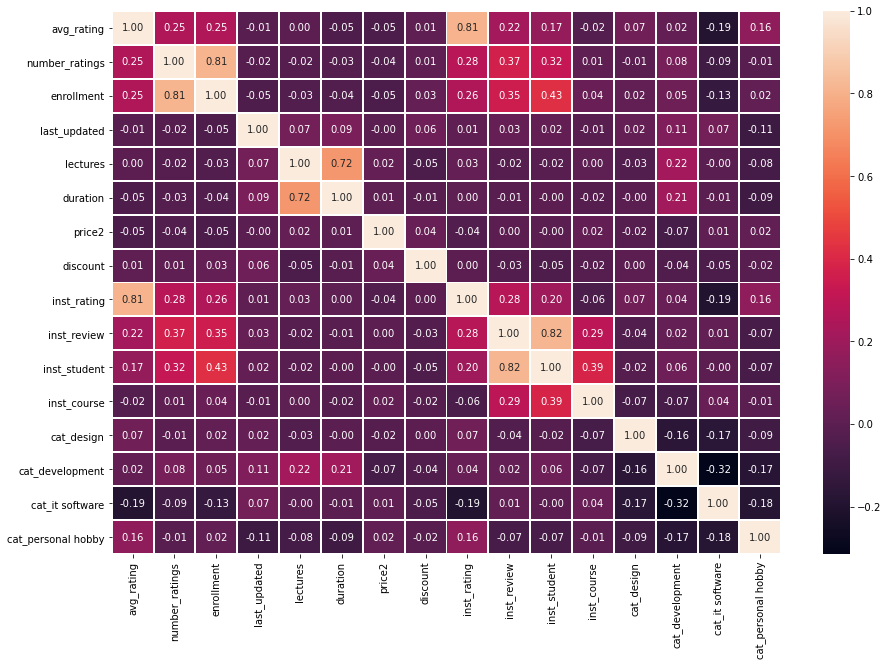

In [8]:
# correlation of all the features in the data, colors indicating the strength of the relationship
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cbar=True, annot=True, fmt = '.2f', linewidths=1,
            yticklabels=df.corr().columns,
            xticklabels=df.corr().columns)

### 2.3 Feature Observation and Hypothesis
We can have the following assumptions based on our knowledge:

   - Courses with high average rating (avg_rating) will have more enrolment. Students usually enroll to courses that has good rating from previous students. Therefore the higher the average rating, the higher the enrolment of students The two variables have positive relationship
   
    
   - Number of ratings received in a course affect student enrolment. The higher the number of ratings received by a course, the higher the enrolment in the course. Students enroll in courses that has been done by many other people previously. We assume that more number of ratings imply that those ratings have been done by people who have taken the course previously thus indicating that many people are taking the course because it is a good course
   
    
   - The number of reviews affect the number of enrolment. The higher the number of reviews received by a course, the higher the enrolment. Similar to second point, it gives an understanding that many people have previously taken the course.
   
    
   - Inst_review and number_ratings can be related in the case that most people who gives rating to the course also leaves a review for the course
   
    
   - Courses with very high price will have lower number in enrolment of the course
   
   
   - Inst_review increases as inst_student increases as the course gets more reviews as more students enrols and completes the course

### 2.4 Univariate Analysis

 - Enrolment Distribution Curve
 - Number of Ratings Distribution Curve
 - Inst_Student Distribution Curve
 - Average Rating Distribution

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

Text(0.5, 1.0, 'Average Rating Distribution')

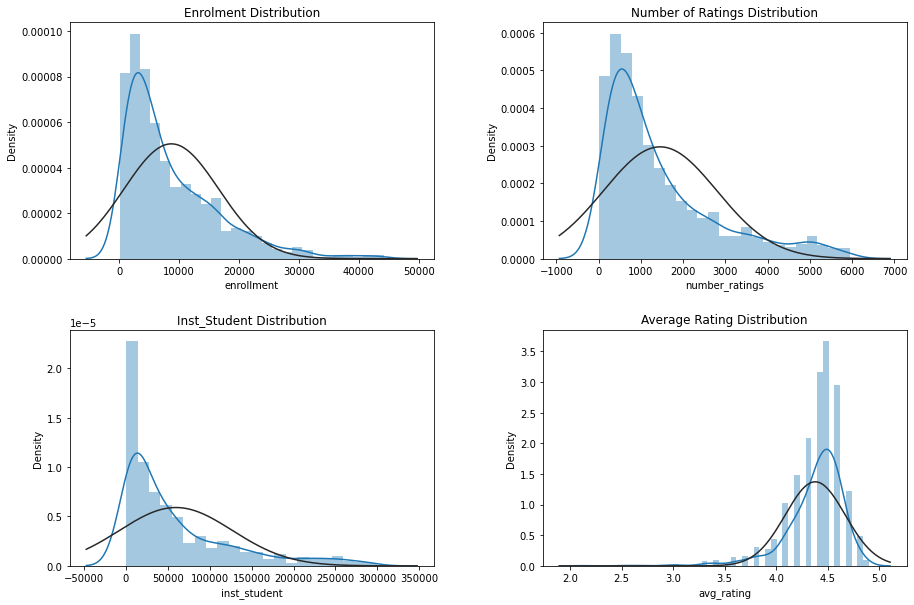

In [9]:
fig, ax =plt.subplots(2,2,figsize=(15, 10))
sns.distplot(df.enrollment,fit=norm, ax=ax[0][0])
sns.distplot(df.number_ratings,fit=norm, ax=ax[0][1])
sns.distplot(df.inst_student,fit=norm, ax=ax[1][0])
sns.distplot(df.avg_rating,fit=norm, ax=ax[1][1])
plt.subplots_adjust(wspace=0.3, hspace=0.3)
ax[0][0].set_title('Enrolment Distribution')
ax[0][1].set_title('Number of Ratings Distribution')
ax[1][0].set_title('Inst_Student Distribution')
ax[1][1].set_title('Average Rating Distribution')

**Distribution curve of Enrolment**
The distribution curve is skewed to the right, positively skewed, therefore it indicates that most of the data points of enrolment in the dataset are to the left. These means that median is less than mean of the data. I had previously eliminated some of the outliers. Highest enrolment of students is 0 to 10,000. Only some courses has very high enrolment.

**Distribution curve of Number of Ratings**
Similar to the Distribution curve of Enrolment the distribution curve is skewed to the right, positively skewed, therefore it indicates that most of the data points of enrolment in the dataset are to the left. These means that median is less than mean of the data.

**Distribution curve of Inst_Student**
The distribution of Inst_Student is not normal, it has a long tail on the right side of the curve. Thus indicating that the total student enrolled in the course up to date are mostly between 0 to 100,000. There are less courses which has been enrolled with very high number of students till date.

**Distribution curve of Average Rating**
The distribution curve is skewed to the left, negatively skewed, therefore it indicates that most of the data points of Average Rating falls to the right side of the curve. Most of the courses have average rating of between 3.5 to 5.0. The median is greater than mean of the data.


### 2.5 Multivariate Analysis

<AxesSubplot:title={'center':'Enrolment vs Number_Ratings'}, xlabel='enrollment', ylabel='number_ratings'>

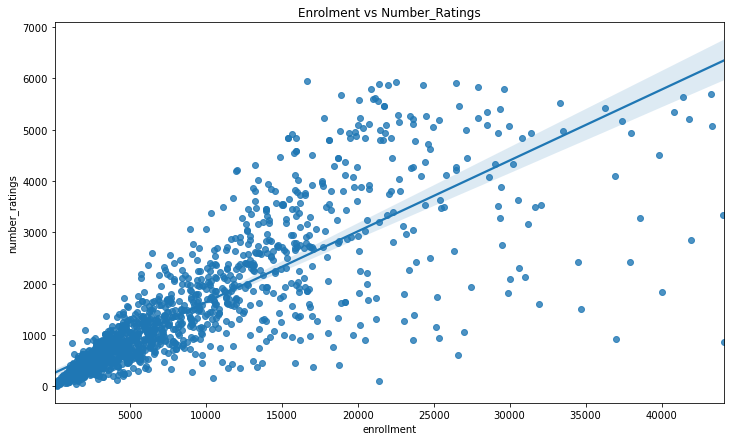

In [10]:
#Multivariate scatter plot with linear regression model
plt.figure(figsize=(12,7))
plt.title('Enrolment vs Number_Ratings')
sns.regplot(data=df, x="enrollment", y='number_ratings')

From the plot we can see that the increase in enrolment increases the number of ratings. Enrolment is directly propotional to number of ratings. The distribution of the data points is dense at left bottom of the plot while it is scatter at the top. This also indicates a very strong positive correlation between the two variables

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Duration vs Lectures'}, xlabel='lectures', ylabel='duration'>

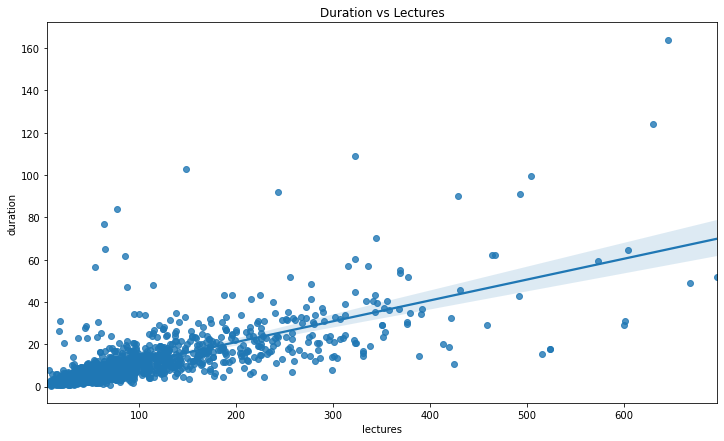

In [11]:
plt.figure(figsize=(12,7))
plt.title('Duration vs Lectures')
sns.regplot(df.lectures,df.duration)

From the scatter plot it is evident that the increase in number of lectures also increases the duration slightly. The scatter plot shows a positive correlation between the two variables

<AxesSubplot:title={'center':'Enrolment vs Inst_Student'}, xlabel='enrollment', ylabel='inst_student'>

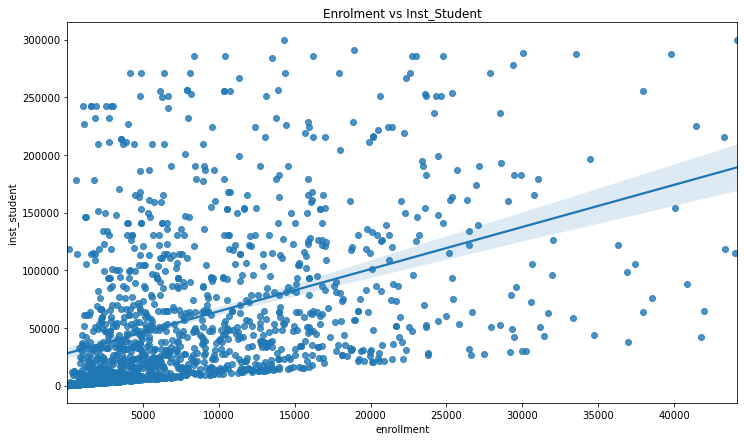

In [12]:
plt.figure(figsize=(12,7))
plt.title('Enrolment vs Inst_Student')
sns.regplot(data=df, x="enrollment", y='inst_student')

There is some positive correlation between enrollment and inst_student but it is not clearly evident because the data points are very scattered. The data points are denser at the lower part of the plot. From the linear regression model line, it shows that there is positive relation between the two variables thus increase in one variable leads to increase on the other one.

## 3. Feature Selection
The features were selected using 3 techniques:
 1. Manual Selection
 2. Variance Threshold Selection
 3. Select K-Best Methos 

In [13]:
# Splitting columns so as to have features and responses columns separately
df_copy = df.copy()
target = df_copy.enrollment
features = df_copy.drop('enrollment', axis=1)

### 3.1 Manual Selection

In [14]:
df_copy.corr()
correlation_matrix=df_copy.corr()
abs_pairs=abs(correlation_matrix)
sorted_pairs=abs_pairs.sort_values('enrollment')
chosen_cols=sorted_pairs[sorted_pairs.enrollment >=0.25]['enrollment']
chosen_cols

avg_rating        0.250074
inst_rating       0.257778
inst_review       0.351730
inst_student      0.428095
number_ratings    0.812137
enrollment        1.000000
Name: enrollment, dtype: float64

In [15]:
df_manual=pd.DataFrame(features, columns=['avg_rating', 'inst_rating', 'inst_review', 'inst_student', 'number_ratings'])
df_manual.head()

,avg_rating,inst_rating,inst_review,inst_student,number_ratings
0,4.5,4.5,11922.0,53659.0,2826.0
1,3.3,3.3,320.0,4012.0,320.0
2,4.4,4.4,2193.0,7422.0,991.0
3,4.2,4.3,25989.0,242683.0,681.0
4,4.3,4.5,25581.0,113480.0,1939.0


The features I chose based on the correlation of features to enollment, I chose features which have correlation greater or equal to 0.25 to enrollement.
The features are:
 - Avg_rating
 - Inst_rating
 - Inst_review
 - Inst_student
 - Number_ratings


### 3.2 Variance Threshold Selection

In [16]:
# I have assigned threshold value to be 0.5
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold=0.5)
vt.fit(features)
vt.get_support()
pd.DataFrame({'variance': vt.variances_, 'select_feature': vt.get_support()}, index=features.columns)

,variance,select_feature
avg_rating,8.463530e-02,False
number_ratings,1.806289e+06,True
last_updated,1.843849e+00,True
lectures,8.772066e+03,True
duration,1.642468e+02,True
price2,4.896027e+02,True
discount,2.658339e+02,True
inst_rating,6.019961e-02,False
inst_review,2.284680e+08,True
inst_student,4.560814e+09,True


In [17]:
# Storing the selected features in a variable
df_vt=features.iloc[:,vt.get_support()]
df_vt

,number_ratings,last_updated,lectures,duration,price2,discount,inst_review,inst_student,inst_course
0,2826.0,20.833333,41.0,7.133333,19.99,88,11922.0,53659.0,10.0
1,320.0,17.166667,72.0,4.133333,16.99,90,320.0,4012.0,3.0
2,991.0,20.666667,91.0,5.233333,28.99,77,2193.0,7422.0,6.0
3,681.0,20.833333,57.0,5.050000,16.99,64,25989.0,242683.0,43.0
4,1939.0,13.333333,142.0,10.766667,20.99,55,25581.0,113480.0,12.0
...,...,...,...,...,...,...,...,...,...
1396,345.0,20.833333,10.0,5.900000,16.99,89,9250.0,159228.0,19.0
1397,693.0,20.750000,20.0,3.133333,21.99,90,693.0,3254.0,1.0
1398,3459.0,15.500000,30.0,1.583333,16.99,81,9123.0,64043.0,26.0
1399,4546.0,20.500000,267.0,32.733333,69.99,51,39566.0,149857.0,226.0


9 features were selected with variance hreshold of 0.5. Selected features are:
 - number_rating
 - last_updated
 - lectures
 - duration
 - price2
 - discount
 - inst_review
 - inst_student
 - inst_course

### 3.3 Select K-Best Method

In [18]:
# I have kept k to be 7 as it gives the best accuracy when doing modelling using the selected features
from sklearn.feature_selection import SelectKBest ,f_regression

sel = SelectKBest(score_func=f_regression, k=7).fit(features, target)

In [19]:
sel.get_support(indices=True)
df_selKBest = features.iloc[:,sel.get_support(indices=True)]
df_selKBest.head()

,avg_rating,number_ratings,inst_rating,inst_review,inst_student,cat_development,cat_it software
0,4.5,2826.0,4.5,11922.0,53659.0,0,0
1,3.3,320.0,3.3,320.0,4012.0,0,0
2,4.4,991.0,4.4,2193.0,7422.0,0,0
3,4.2,681.0,4.3,25989.0,242683.0,0,1
4,4.3,1939.0,4.5,25581.0,113480.0,0,0


The selected features are:
 - avg_rating
 - number_ratings
 - inst_rating
 - inst_review
 - inst_student
 - cat_development
 - cat_it software

## 4. Linear Regression Models with Feature Selection, Feature transformation and Scaling

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Initiating lists to store experiments results
feature_selection=[]
feature_transform=[]
feature_scaling=[]
r2_values=[]
rmse_values=[]

In [21]:
#Created a function to perform polynomial transformation with degree 2. 
def pol_feat_transform(x):
    pf = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
    res = pf.fit_transform(x)
    cols=pf.get_feature_names(x.columns)
    pdf = pd.DataFrame(res,columns=cols)
    return pdf

#Created a function to perform Log1P transformation of the data
def log1p_feat_transform(data):
    df_log_df = data.apply(lambda x: np.log1p(x))
    return df_log_df

# A function used to perform scaling when modelling. MinMax scaling is used for scaling thee data
def minmax_scaling(data):
    ms = MinMaxScaler()
    scaled_features = ms.fit_transform(data)
    scaled_df = pd.DataFrame(scaled_features, columns=data.columns)
    scaled_df
    return scaled_df

### 4.1 Linear Regression model with All features

In [22]:
# Splitting of data df_manual to train and test data set with test size of .25 and random state 42

# Using the original set of features having all the features
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

In [23]:
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression()

In [24]:
# Predicting values of X_test
pred = model_1.predict(X_test)
#Getting R2 and RMSE from the prediction model
r2 = model_1.score(X_test, y_test) #finding and storing r square of the model
mse = mean_squared_error(y_test, pred) # finding RMSE of the model
rmse=mse**0.5
print(r2,rmse)

0.761109339938491 3886.4588919114362


In [25]:
feature_selection.append('All')
feature_transform.append('None')
feature_scaling.append('None')
r2_values.append(r2)
rmse_values.append(rmse)

### 4.2 Linear Regression model with All features and Polynomial Features transformation

In [26]:
# Degree of 2 is used in polynomial transformation. The features are cross multiplied with other features and itsef too
df_poly_all = pol_feat_transform(features)
df_poly_all.head()

,avg_rating,number_ratings,last_updated,lectures,duration,price2,discount,inst_rating,inst_review,inst_student,...,cat_design^2,cat_design cat_development,cat_design cat_it software,cat_design cat_personal hobby,cat_development^2,cat_development cat_it software,cat_development cat_personal hobby,cat_it software^2,cat_it software cat_personal hobby,cat_personal hobby^2
0,4.5,2826.0,20.833333,41.0,7.133333,19.99,88.0,4.5,11922.0,53659.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.3,320.0,17.166667,72.0,4.133333,16.99,90.0,3.3,320.0,4012.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.4,991.0,20.666667,91.0,5.233333,28.99,77.0,4.4,2193.0,7422.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.2,681.0,20.833333,57.0,5.050000,16.99,64.0,4.3,25989.0,242683.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4.3,1939.0,13.333333,142.0,10.766667,20.99,55.0,4.5,25581.0,113480.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# Using transformed features for train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_poly_all, target, test_size=0.25, random_state=42)
model_2 = LinearRegression()
model_2.fit(X_train, y_train)
pred = model_2.predict(X_test)
r2 = model_2.score(X_test, y_test)
mse = mean_squared_error(y_test, pred)
rmse=mse**0.5
print(r2,rmse)

0.7133630946902134 4257.165621400268


In [28]:
feature_selection.append('All')
feature_transform.append('Poly 2')
feature_scaling.append('None')
r2_values.append(r2)
rmse_values.append(rmse)

### 4.3 Linear Regression model with All features and Log1P transformation

In [29]:
# Using log1p_feat_transform function to perform transormation on features
df_log1p_all = log1p_feat_transform(features)
df_log1p_all

,avg_rating,number_ratings,last_updated,lectures,duration,price2,discount,inst_rating,inst_review,inst_student,inst_course,cat_design,cat_development,cat_it software,cat_personal hobby
0,1.704748,7.946971,3.083438,3.737670,2.095971,3.044046,4.488636,1.704748,9.386225,10.890423,2.397895,0.0,0.0,0.000000,0.0
1,1.458615,5.771441,2.899588,4.290459,1.635755,2.889816,4.510860,1.458615,5.771441,8.297294,1.386294,0.0,0.0,0.000000,0.0
2,1.686399,6.899723,3.075775,4.521789,1.829911,3.400864,4.356709,1.686399,7.693482,8.912339,1.945910,0.0,0.0,0.000000,0.0
3,1.648659,6.525030,3.083438,4.060443,1.800058,2.889816,4.174387,1.667707,10.165467,12.399515,3.784190,0.0,0.0,0.693147,0.0
4,1.667707,7.570443,2.662588,4.962845,2.465271,3.090588,4.025352,1.704748,10.149644,11.639391,2.564949,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396,1.686399,5.846439,3.083438,2.397895,1.931521,2.889816,4.499810,1.648659,9.132487,11.978099,2.995732,0.0,0.0,0.693147,0.0
1397,1.568616,6.542472,3.079614,3.044522,1.419084,3.135059,4.510860,1.568616,6.542472,8.087948,0.693147,0.0,0.0,0.000000,0.0
1398,1.648659,8.149024,2.803360,3.433987,0.949081,2.889816,4.406719,1.648659,9.118664,11.067326,3.295837,0.0,0.0,0.000000,0.0
1399,1.704748,8.422223,3.068053,5.590987,3.518486,4.262539,3.951244,1.686399,10.585751,11.917443,5.424950,0.0,0.0,0.693147,0.0


In [30]:
# Using features that are transformed by Log1P transformation function, for obtaining training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(df_log1p_all, target, test_size=0.25, random_state=42)
model_3 = LinearRegression()
model_3.fit(X_train, y_train)
pred = model_3.predict(X_test)
r2 = model_3.score(X_test, y_test)
mse = mean_squared_error(y_test, pred)
rmse=mse**0.5
print(r2,rmse)

0.6300031172536753 4836.748724157127


In [31]:
feature_selection.append('All')
feature_transform.append('Log1P')
feature_scaling.append('None')
r2_values.append(r2)
rmse_values.append(rmse)

### 4.4 Linear Regression model with All features and MinMax Scaling

In [32]:
# Scaling the features using MinMax scaling function
df_minmax_all = minmax_scaling(features)
df_minmax_all

,avg_rating,number_ratings,last_updated,lectures,duration,price2,discount,inst_rating,inst_review,inst_student,inst_course,cat_design,cat_development,cat_it software,cat_personal hobby
0,0.857143,0.473374,1.000000,0.052098,0.040571,0.016393,0.935484,0.863636,0.103620,0.178740,0.031802,0.0,0.0,0.0,0.0
1,0.428571,0.051062,0.600000,0.096961,0.022222,0.000000,0.967742,0.318182,0.002518,0.013194,0.007067,0.0,0.0,0.0,0.0
2,0.821429,0.164139,0.981818,0.124457,0.028950,0.065574,0.758065,0.818182,0.018840,0.024565,0.017668,0.0,0.0,0.0,0.0
3,0.750000,0.111898,1.000000,0.075253,0.027829,0.000000,0.548387,0.772727,0.226202,0.809030,0.148410,0.0,0.0,1.0,0.0
4,0.785714,0.323896,0.181818,0.198263,0.062793,0.021858,0.403226,0.863636,0.222646,0.378209,0.038869,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396,0.821429,0.055275,1.000000,0.007236,0.033028,0.000000,0.951613,0.727273,0.080336,0.530754,0.063604,0.0,0.0,1.0,0.0
1397,0.607143,0.113920,0.990909,0.021708,0.016106,0.027322,0.967742,0.545455,0.005769,0.010667,0.000000,0.0,0.0,0.0,0.0
1398,0.750000,0.580047,0.418182,0.036179,0.006626,0.000000,0.822581,0.727273,0.079229,0.213364,0.088339,0.0,0.0,0.0,0.0
1399,0.857143,0.763229,0.963636,0.379161,0.197146,0.289617,0.338710,0.818182,0.344514,0.499507,0.795053,0.0,0.0,1.0,0.0


In [33]:
# Using scaled features for obtaining training and test dataset for further modelling purpose
X_train, X_test, y_train, y_test = train_test_split(df_minmax_all, target, test_size=0.25, random_state=42)
model_4 = LinearRegression()
model_4.fit(X_train, y_train)
pred = model_4.predict(X_test)
r2 = model_4.score(X_test, y_test)
mse = mean_squared_error(y_test, pred)
rmse=mse**0.5
print(r2,rmse)

0.7611093399384938 3886.4588919114126


In [34]:
feature_selection.append('All')
feature_transform.append('None')
feature_scaling.append('MinMax')
r2_values.append(r2)
rmse_values.append(rmse)

### 4.5 Linear Regression model with All features, Polynomial Features and MinMax Scaling

In [35]:
#Performing polynomial transformation on all features
df_poly_all = pol_feat_transform(features)
df_poly_all

,avg_rating,number_ratings,last_updated,lectures,duration,price2,discount,inst_rating,inst_review,inst_student,...,cat_design^2,cat_design cat_development,cat_design cat_it software,cat_design cat_personal hobby,cat_development^2,cat_development cat_it software,cat_development cat_personal hobby,cat_it software^2,cat_it software cat_personal hobby,cat_personal hobby^2
0,4.5,2826.0,20.833333,41.0,7.133333,19.99,88.0,4.5,11922.0,53659.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.3,320.0,17.166667,72.0,4.133333,16.99,90.0,3.3,320.0,4012.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.4,991.0,20.666667,91.0,5.233333,28.99,77.0,4.4,2193.0,7422.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.2,681.0,20.833333,57.0,5.050000,16.99,64.0,4.3,25989.0,242683.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4.3,1939.0,13.333333,142.0,10.766667,20.99,55.0,4.5,25581.0,113480.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396,4.4,345.0,20.833333,10.0,5.900000,16.99,89.0,4.2,9250.0,159228.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1397,3.8,693.0,20.750000,20.0,3.133333,21.99,90.0,3.8,693.0,3254.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1398,4.2,3459.0,15.500000,30.0,1.583333,16.99,81.0,4.2,9123.0,64043.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1399,4.5,4546.0,20.500000,267.0,32.733333,69.99,51.0,4.4,39566.0,149857.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [36]:
#Scaling transformed features above
df_minmax_all = minmax_scaling(df_poly_all)
df_minmax_all

,avg_rating,number_ratings,last_updated,lectures,duration,price2,discount,inst_rating,inst_review,inst_student,...,cat_design^2,cat_design cat_development,cat_design cat_it software,cat_design cat_personal hobby,cat_development^2,cat_development cat_it software,cat_development cat_personal hobby,cat_it software^2,cat_it software cat_personal hobby,cat_personal hobby^2
0,0.857143,0.473374,1.000000,0.052098,0.040571,0.016393,0.935484,0.863636,0.103620,0.178740,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.428571,0.051062,0.600000,0.096961,0.022222,0.000000,0.967742,0.318182,0.002518,0.013194,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.821429,0.164139,0.981818,0.124457,0.028950,0.065574,0.758065,0.818182,0.018840,0.024565,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.750000,0.111898,1.000000,0.075253,0.027829,0.000000,0.548387,0.772727,0.226202,0.809030,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.785714,0.323896,0.181818,0.198263,0.062793,0.021858,0.403226,0.863636,0.222646,0.378209,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396,0.821429,0.055275,1.000000,0.007236,0.033028,0.000000,0.951613,0.727273,0.080336,0.530754,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1397,0.607143,0.113920,0.990909,0.021708,0.016106,0.027322,0.967742,0.545455,0.005769,0.010667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1398,0.750000,0.580047,0.418182,0.036179,0.006626,0.000000,0.822581,0.727273,0.079229,0.213364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1399,0.857143,0.763229,0.963636,0.379161,0.197146,0.289617,0.338710,0.818182,0.344514,0.499507,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [37]:
#Using scaled nd transformed data to model
X_train, X_test, y_train, y_test = train_test_split(df_minmax_all, target, test_size=0.25, random_state=42)
model_5 = LinearRegression()
model_5.fit(X_train, y_train)
pred = model_5.predict(X_test)
r2 = model_5.score(X_test, y_test)
mse = mean_squared_error(y_test, pred)
rmse=mse**0.5
print(r2,rmse)

0.7133630137137916 4257.166222735979


In [38]:
feature_selection.append('All')
feature_transform.append('Poly 2')
feature_scaling.append('MinMax')
r2_values.append(r2)
rmse_values.append(rmse)

### 4.6 Linear Regression model with All features, Log1P Transformation and MinMax Scaling

In [39]:
#Transforming features using Log1P transformation
df_log1p_all = log1p_feat_transform(features)
df_log1p_all

,avg_rating,number_ratings,last_updated,lectures,duration,price2,discount,inst_rating,inst_review,inst_student,inst_course,cat_design,cat_development,cat_it software,cat_personal hobby
0,1.704748,7.946971,3.083438,3.737670,2.095971,3.044046,4.488636,1.704748,9.386225,10.890423,2.397895,0.0,0.0,0.000000,0.0
1,1.458615,5.771441,2.899588,4.290459,1.635755,2.889816,4.510860,1.458615,5.771441,8.297294,1.386294,0.0,0.0,0.000000,0.0
2,1.686399,6.899723,3.075775,4.521789,1.829911,3.400864,4.356709,1.686399,7.693482,8.912339,1.945910,0.0,0.0,0.000000,0.0
3,1.648659,6.525030,3.083438,4.060443,1.800058,2.889816,4.174387,1.667707,10.165467,12.399515,3.784190,0.0,0.0,0.693147,0.0
4,1.667707,7.570443,2.662588,4.962845,2.465271,3.090588,4.025352,1.704748,10.149644,11.639391,2.564949,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396,1.686399,5.846439,3.083438,2.397895,1.931521,2.889816,4.499810,1.648659,9.132487,11.978099,2.995732,0.0,0.0,0.693147,0.0
1397,1.568616,6.542472,3.079614,3.044522,1.419084,3.135059,4.510860,1.568616,6.542472,8.087948,0.693147,0.0,0.0,0.000000,0.0
1398,1.648659,8.149024,2.803360,3.433987,0.949081,2.889816,4.406719,1.648659,9.118664,11.067326,3.295837,0.0,0.0,0.000000,0.0
1399,1.704748,8.422223,3.068053,5.590987,3.518486,4.262539,3.951244,1.686399,10.585751,11.917443,5.424950,0.0,0.0,0.693147,0.0


In [40]:
#Scaling features that were transformed using Log1P transformation
df_minmax_all = minmax_scaling(df_log1p_all)
df_minmax_all

,avg_rating,number_ratings,last_updated,lectures,duration,price2,discount,inst_rating,inst_review,inst_student,inst_course,cat_design,cat_development,cat_it software,cat_personal hobby
0,0.890911,0.871661,1.000000,0.409232,0.359645,0.063905,0.959983,0.888641,0.723325,0.799562,0.343745,0.0,0.0,0.0,0.0
1,0.508450,0.496641,0.662329,0.525486,0.261737,0.000000,0.980211,0.372557,0.281695,0.497545,0.139766,0.0,0.0,0.0,0.0
2,0.862399,0.691135,0.985926,0.574135,0.303043,0.211751,0.839897,0.850167,0.516517,0.569178,0.252607,0.0,0.0,0.0,0.0
3,0.803755,0.626545,1.000000,0.477113,0.296692,0.000000,0.673941,0.810974,0.818527,0.975323,0.623277,0.0,0.0,1.0,0.0
4,0.833353,0.806754,0.227038,0.666891,0.438212,0.083189,0.538283,0.888641,0.816594,0.886793,0.377430,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396,0.862399,0.509569,1.000000,0.127473,0.324660,0.000000,0.970153,0.771034,0.692325,0.926242,0.464292,0.0,0.0,1.0,0.0
1397,0.679378,0.629552,0.992976,0.263461,0.215642,0.101616,0.980211,0.603203,0.375894,0.473163,0.000000,0.0,0.0,0.0,0.0
1398,0.803755,0.906491,0.485590,0.345367,0.115651,0.000000,0.885419,0.771034,0.690636,0.820166,0.524805,0.0,0.0,0.0,0.0
1399,0.890911,0.953585,0.971743,0.798992,0.662277,0.568783,0.470827,0.850167,0.869874,0.919177,0.954119,0.0,0.0,1.0,0.0


In [41]:
#Using transformed and scaled dataset to create the model
X_train, X_test, y_train, y_test = train_test_split(df_minmax_all, target, test_size=0.25, random_state=42)
model_6 = LinearRegression()
model_6.fit(X_train, y_train)
pred = model_6.predict(X_test)
r2 = model_6.score(X_test, y_test)
mse = mean_squared_error(y_test, pred)
rmse=mse**0.5
print(r2,rmse)

0.6300031172536753 4836.748724157127


In [42]:
feature_selection.append('All')
feature_transform.append('Log1P')
feature_scaling.append('MinMax')
r2_values.append(r2)
rmse_values.append(rmse)

### 4.7 Linear Regression model with Manual Selection

In [43]:
#Creating model using features that were selected manually
X_train, X_test, y_train, y_test = train_test_split(df_manual, target, test_size=0.25, random_state=42)
model_7 = LinearRegression()
model_7.fit(X_train, y_train)
pred = model_7.predict(X_test)
r2 = model_7.score(X_test, y_test)
mse = mean_squared_error(y_test, pred)
rmse=mse**0.5
print(r2,rmse)

0.7592227950441219 3901.7746030814646


In [44]:
feature_selection.append('Manual')
feature_transform.append('None')
feature_scaling.append('None')
r2_values.append(r2)
rmse_values.append(rmse)

### 4.8 Linear Regression model with Manual Selection and Polynomial Features transformation

In [45]:
#Transforming df_manual using polynomial transformation
df_poly_man = pol_feat_transform(df_manual)
df_poly_man

,avg_rating,inst_rating,inst_review,inst_student,number_ratings,avg_rating^2,avg_rating inst_rating,avg_rating inst_review,avg_rating inst_student,avg_rating number_ratings,inst_rating^2,inst_rating inst_review,inst_rating inst_student,inst_rating number_ratings,inst_review^2,inst_review inst_student,inst_review number_ratings,inst_student^2,inst_student number_ratings,number_ratings^2
0,4.5,4.5,11922.0,53659.0,2826.0,20.25,20.25,53649.0,241465.5,12717.0,20.25,53649.0,241465.5,12717.0,1.421341e+08,6.397226e+08,33691572.0,2.879288e+09,151640334.0,7986276.0
1,3.3,3.3,320.0,4012.0,320.0,10.89,10.89,1056.0,13239.6,1056.0,10.89,1056.0,13239.6,1056.0,1.024000e+05,1.283840e+06,102400.0,1.609614e+07,1283840.0,102400.0
2,4.4,4.4,2193.0,7422.0,991.0,19.36,19.36,9649.2,32656.8,4360.4,19.36,9649.2,32656.8,4360.4,4.809249e+06,1.627645e+07,2173263.0,5.508608e+07,7355202.0,982081.0
3,4.2,4.3,25989.0,242683.0,681.0,17.64,18.06,109153.8,1019268.6,2860.2,18.49,111752.7,1043536.9,2928.3,6.754281e+08,6.307088e+09,17698509.0,5.889504e+10,165267123.0,463761.0
4,4.3,4.5,25581.0,113480.0,1939.0,18.49,19.35,109998.3,487964.0,8337.7,20.25,115114.5,510660.0,8725.5,6.543876e+08,2.902932e+09,49601559.0,1.287771e+10,220037720.0,3759721.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396,4.4,4.2,9250.0,159228.0,345.0,19.36,18.48,40700.0,700603.2,1518.0,17.64,38850.0,668757.6,1449.0,8.556250e+07,1.472859e+09,3191250.0,2.535356e+10,54933660.0,119025.0
1397,3.8,3.8,693.0,3254.0,693.0,14.44,14.44,2633.4,12365.2,2633.4,14.44,2633.4,12365.2,2633.4,4.802490e+05,2.255022e+06,480249.0,1.058852e+07,2255022.0,480249.0
1398,4.2,4.2,9123.0,64043.0,3459.0,17.64,17.64,38316.6,268980.6,14527.8,17.64,38316.6,268980.6,14527.8,8.322913e+07,5.842643e+08,31556457.0,4.101506e+09,221524737.0,11964681.0
1399,4.5,4.4,39566.0,149857.0,4546.0,20.25,19.80,178047.0,674356.5,20457.0,19.36,174090.4,659370.8,20002.4,1.565468e+09,5.929242e+09,179867036.0,2.245712e+10,681249922.0,20666116.0


In [46]:
#Using transformed features for modelling
X_train, X_test, y_train, y_test = train_test_split(df_poly_man, target, test_size=0.25, random_state=42)
model_8 = LinearRegression()
model_8.fit(X_train, y_train)
pred = model_8.predict(X_test)
r2 = model_8.score(X_test, y_test)
mse = mean_squared_error(y_test, pred)
rmse=mse**0.5
print(r2,rmse)

0.7556633806059555 3930.5088057282715


In [47]:
feature_selection.append('Manual')
feature_transform.append('Poly 2')
feature_scaling.append('None')
r2_values.append(r2)
rmse_values.append(rmse)

### 4.9 Linear Regression model with Manual Selection and Log1P Features transformation

In [48]:
#Using Log1P transformation to transform df_manual features
df_log1p_man = log1p_feat_transform(df_manual)
df_log1p_man

,avg_rating,inst_rating,inst_review,inst_student,number_ratings
0,1.704748,1.704748,9.386225,10.890423,7.946971
1,1.458615,1.458615,5.771441,8.297294,5.771441
2,1.686399,1.686399,7.693482,8.912339,6.899723
3,1.648659,1.667707,10.165467,12.399515,6.525030
4,1.667707,1.704748,10.149644,11.639391,7.570443
...,...,...,...,...,...
1396,1.686399,1.648659,9.132487,11.978099,5.846439
1397,1.568616,1.568616,6.542472,8.087948,6.542472
1398,1.648659,1.648659,9.118664,11.067326,8.149024
1399,1.704748,1.686399,10.585751,11.917443,8.422223


In [49]:
X_train, X_test, y_train, y_test = train_test_split(df_log1p_man, target, test_size=0.25, random_state=42)
model_9 = LinearRegression()
model_9.fit(X_train, y_train)
pred = model_9.predict(X_test)
r2 = model_9.score(X_test, y_test)
mse = mean_squared_error(y_test, pred)
rmse=mse**0.5
print(r2,rmse)

0.6304315023840854 4833.947901476248


In [50]:
feature_selection.append('Manual')
feature_transform.append('Log1P')
feature_scaling.append('None')
r2_values.append(r2)
rmse_values.append(rmse)

### 4.10 Linear Regression model with Manual Selection and MinMax Scaling

In [51]:
#Scaling df_manual to remove biasness of the data
df_minmax_man = minmax_scaling(df_manual)
df_minmax_man

,avg_rating,inst_rating,inst_review,inst_student,number_ratings
0,0.857143,0.863636,0.103620,0.178740,0.473374
1,0.428571,0.318182,0.002518,0.013194,0.051062
2,0.821429,0.818182,0.018840,0.024565,0.164139
3,0.750000,0.772727,0.226202,0.809030,0.111898
4,0.785714,0.863636,0.222646,0.378209,0.323896
...,...,...,...,...,...
1396,0.821429,0.727273,0.080336,0.530754,0.055275
1397,0.607143,0.545455,0.005769,0.010667,0.113920
1398,0.750000,0.727273,0.079229,0.213364,0.580047
1399,0.857143,0.818182,0.344514,0.499507,0.763229


In [52]:
#using the scaled data to create model
X_train, X_test, y_train, y_test = train_test_split(df_minmax_man, target, test_size=0.25, random_state=42)
model_10 = LinearRegression()
model_10.fit(X_train, y_train)
pred = model_10.predict(X_test)
r2 = model_10.score(X_test, y_test)
mse = mean_squared_error(y_test, pred)
rmse=mse**0.5
print(r2,rmse)

0.7592227950441499 3901.7746030812377


In [53]:
feature_selection.append('Manual')
feature_transform.append('None')
feature_scaling.append('MinMax')
r2_values.append(r2)
rmse_values.append(rmse)

### 4.11 Linear Regression model with Manual Selection, Polynomial Transformation and MinMax Scaling

In [54]:
#Transforming df_manual using polynomial transformation
df_poly_man = pol_feat_transform(df_manual)
df_poly_man

,avg_rating,inst_rating,inst_review,inst_student,number_ratings,avg_rating^2,avg_rating inst_rating,avg_rating inst_review,avg_rating inst_student,avg_rating number_ratings,inst_rating^2,inst_rating inst_review,inst_rating inst_student,inst_rating number_ratings,inst_review^2,inst_review inst_student,inst_review number_ratings,inst_student^2,inst_student number_ratings,number_ratings^2
0,4.5,4.5,11922.0,53659.0,2826.0,20.25,20.25,53649.0,241465.5,12717.0,20.25,53649.0,241465.5,12717.0,1.421341e+08,6.397226e+08,33691572.0,2.879288e+09,151640334.0,7986276.0
1,3.3,3.3,320.0,4012.0,320.0,10.89,10.89,1056.0,13239.6,1056.0,10.89,1056.0,13239.6,1056.0,1.024000e+05,1.283840e+06,102400.0,1.609614e+07,1283840.0,102400.0
2,4.4,4.4,2193.0,7422.0,991.0,19.36,19.36,9649.2,32656.8,4360.4,19.36,9649.2,32656.8,4360.4,4.809249e+06,1.627645e+07,2173263.0,5.508608e+07,7355202.0,982081.0
3,4.2,4.3,25989.0,242683.0,681.0,17.64,18.06,109153.8,1019268.6,2860.2,18.49,111752.7,1043536.9,2928.3,6.754281e+08,6.307088e+09,17698509.0,5.889504e+10,165267123.0,463761.0
4,4.3,4.5,25581.0,113480.0,1939.0,18.49,19.35,109998.3,487964.0,8337.7,20.25,115114.5,510660.0,8725.5,6.543876e+08,2.902932e+09,49601559.0,1.287771e+10,220037720.0,3759721.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396,4.4,4.2,9250.0,159228.0,345.0,19.36,18.48,40700.0,700603.2,1518.0,17.64,38850.0,668757.6,1449.0,8.556250e+07,1.472859e+09,3191250.0,2.535356e+10,54933660.0,119025.0
1397,3.8,3.8,693.0,3254.0,693.0,14.44,14.44,2633.4,12365.2,2633.4,14.44,2633.4,12365.2,2633.4,4.802490e+05,2.255022e+06,480249.0,1.058852e+07,2255022.0,480249.0
1398,4.2,4.2,9123.0,64043.0,3459.0,17.64,17.64,38316.6,268980.6,14527.8,17.64,38316.6,268980.6,14527.8,8.322913e+07,5.842643e+08,31556457.0,4.101506e+09,221524737.0,11964681.0
1399,4.5,4.4,39566.0,149857.0,4546.0,20.25,19.80,178047.0,674356.5,20457.0,19.36,174090.4,659370.8,20002.4,1.565468e+09,5.929242e+09,179867036.0,2.245712e+10,681249922.0,20666116.0


In [55]:
#Scaling dataset that has been transformed using polynomial transformation
df_minmax_man = minmax_scaling(df_poly_man)
df_minmax_man

,avg_rating,inst_rating,inst_review,inst_student,number_ratings,avg_rating^2,avg_rating inst_rating,avg_rating inst_review,avg_rating inst_student,avg_rating number_ratings,inst_rating^2,inst_rating inst_review,inst_rating inst_student,inst_rating number_ratings,inst_review^2,inst_review inst_student,inst_review number_ratings,inst_student^2,inst_student number_ratings,number_ratings^2
0,0.857143,0.863636,0.103620,0.178740,0.473374,0.808163,0.804893,0.101404,0.171155,0.457573,0.828624,0.101396,0.174866,0.457467,0.010787,0.019525,0.056948,0.032002,0.091999,0.225503
1,0.428571,0.318182,0.002518,0.013194,0.051062,0.330612,0.246420,0.001777,0.009244,0.035727,0.253686,0.001769,0.009433,0.035539,0.000008,0.000039,0.000172,0.000179,0.000778,0.002883
2,0.821429,0.818182,0.018840,0.024565,0.164139,0.762755,0.751790,0.018055,0.023019,0.155266,0.773956,0.018047,0.023508,0.155101,0.000365,0.000497,0.003673,0.000612,0.004462,0.027723
3,0.750000,0.772727,0.226202,0.809030,0.111898,0.675000,0.674224,0.206546,0.722953,0.100996,0.720516,0.211462,0.756260,0.103284,0.051262,0.192501,0.029915,0.654586,0.100267,0.013087
4,0.785714,0.863636,0.222646,0.378209,0.323896,0.718367,0.751193,0.208145,0.346029,0.299148,0.828624,0.217831,0.369996,0.313043,0.049665,0.088601,0.083840,0.143129,0.133496,0.106156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396,0.821429,0.727273,0.080336,0.530754,0.055275,0.762755,0.699284,0.076874,0.496882,0.052440,0.668305,0.073362,0.484595,0.049759,0.006494,0.044954,0.005393,0.281791,0.033328,0.003353
1397,0.607143,0.545455,0.005769,0.010667,0.113920,0.511735,0.458234,0.004765,0.008624,0.092791,0.471744,0.004757,0.008800,0.092614,0.000036,0.000069,0.000811,0.000118,0.001368,0.013553
1398,0.750000,0.727273,0.079229,0.213364,0.580047,0.675000,0.649165,0.072360,0.190675,0.523080,0.668305,0.072352,0.194811,0.522987,0.006317,0.017832,0.053339,0.045586,0.134398,0.337842
1399,0.857143,0.818182,0.344514,0.499507,0.763229,0.808163,0.778043,0.337049,0.478261,0.737574,0.773956,0.329549,0.477791,0.721074,0.118812,0.180968,0.304028,0.249598,0.413313,0.583548


In [56]:
#Using scaled and transformed df_manual dataset to create model
X_train, X_test, y_train, y_test = train_test_split(df_minmax_man, target, test_size=0.25, random_state=42)
model_11 = LinearRegression()
model_11.fit(X_train, y_train)
pred = model_11.predict(X_test)
r2 = model_11.score(X_test, y_test)
mse = mean_squared_error(y_test, pred)
rmse=mse**0.5
print(r2,rmse)

0.7556633094356728 3930.5093781668256


In [57]:
feature_selection.append('Manual')
feature_transform.append('Poly 2')
feature_scaling.append('MinMax')
r2_values.append(r2)
rmse_values.append(rmse)

### 4.12 Linear Regression model with Manual Selection, Log1P Transformation and MinMax Scaling

In [58]:
#Using Log1P transformation to transform df_manual features
df_log1p_man = log1p_feat_transform(df_manual)
df_log1p_man

,avg_rating,inst_rating,inst_review,inst_student,number_ratings
0,1.704748,1.704748,9.386225,10.890423,7.946971
1,1.458615,1.458615,5.771441,8.297294,5.771441
2,1.686399,1.686399,7.693482,8.912339,6.899723
3,1.648659,1.667707,10.165467,12.399515,6.525030
4,1.667707,1.704748,10.149644,11.639391,7.570443
...,...,...,...,...,...
1396,1.686399,1.648659,9.132487,11.978099,5.846439
1397,1.568616,1.568616,6.542472,8.087948,6.542472
1398,1.648659,1.648659,9.118664,11.067326,8.149024
1399,1.704748,1.686399,10.585751,11.917443,8.422223


In [59]:
#Scaling dataset that has been transformed using Log1P transformation
df_minmax_man = minmax_scaling(df_log1p_all)
df_minmax_man

,avg_rating,number_ratings,last_updated,lectures,duration,price2,discount,inst_rating,inst_review,inst_student,inst_course,cat_design,cat_development,cat_it software,cat_personal hobby
0,0.890911,0.871661,1.000000,0.409232,0.359645,0.063905,0.959983,0.888641,0.723325,0.799562,0.343745,0.0,0.0,0.0,0.0
1,0.508450,0.496641,0.662329,0.525486,0.261737,0.000000,0.980211,0.372557,0.281695,0.497545,0.139766,0.0,0.0,0.0,0.0
2,0.862399,0.691135,0.985926,0.574135,0.303043,0.211751,0.839897,0.850167,0.516517,0.569178,0.252607,0.0,0.0,0.0,0.0
3,0.803755,0.626545,1.000000,0.477113,0.296692,0.000000,0.673941,0.810974,0.818527,0.975323,0.623277,0.0,0.0,1.0,0.0
4,0.833353,0.806754,0.227038,0.666891,0.438212,0.083189,0.538283,0.888641,0.816594,0.886793,0.377430,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396,0.862399,0.509569,1.000000,0.127473,0.324660,0.000000,0.970153,0.771034,0.692325,0.926242,0.464292,0.0,0.0,1.0,0.0
1397,0.679378,0.629552,0.992976,0.263461,0.215642,0.101616,0.980211,0.603203,0.375894,0.473163,0.000000,0.0,0.0,0.0,0.0
1398,0.803755,0.906491,0.485590,0.345367,0.115651,0.000000,0.885419,0.771034,0.690636,0.820166,0.524805,0.0,0.0,0.0,0.0
1399,0.890911,0.953585,0.971743,0.798992,0.662277,0.568783,0.470827,0.850167,0.869874,0.919177,0.954119,0.0,0.0,1.0,0.0


In [60]:
#Using scaled and transformed df_manual dataset to create model
X_train, X_test, y_train, y_test = train_test_split(df_minmax_man, target, test_size=0.25, random_state=42)
model_12 = LinearRegression()
model_12.fit(X_train, y_train)
pred = model_12.predict(X_test)
r2 = model_12.score(X_test, y_test)
mse = mean_squared_error(y_test, pred)
rmse=mse**0.5
print(r2,rmse)

0.6300031172536753 4836.748724157127


In [61]:
feature_selection.append('Manual')
feature_transform.append('Log1P')
feature_scaling.append('MinMax')
r2_values.append(r2)
rmse_values.append(rmse)

### 4.13 Linear Regression model with Variance Threshold Selection

In [62]:
#Creating model using features obtained by Variance Threshold method df_vt
X_train, X_test, y_train, y_test = train_test_split(df_vt, target, test_size=0.25, random_state=42)
model_13 = LinearRegression()
model_13.fit(X_train, y_train)
pred = model_13.predict(X_test)
r2 = model_13.score(X_test, y_test)
mse = mean_squared_error(y_test, pred)
rmse=mse**0.5
print(r2,rmse)

0.7613778066553084 3884.2744654382154


In [63]:
feature_selection.append('VT')
feature_transform.append('None')
feature_scaling.append('None')
r2_values.append(r2)
rmse_values.append(rmse)

### 4.14 Linear Regression model with Variance Threshold Selection and Polynomial Feature Transformation

In [64]:
#Transforming df_vt using polynomial transformation
df_poly_vt = pol_feat_transform(df_vt)
df_poly_vt

,number_ratings,last_updated,lectures,duration,price2,discount,inst_review,inst_student,inst_course,number_ratings^2,...,discount^2,discount inst_review,discount inst_student,discount inst_course,inst_review^2,inst_review inst_student,inst_review inst_course,inst_student^2,inst_student inst_course,inst_course^2
0,2826.0,20.833333,41.0,7.133333,19.99,88.0,11922.0,53659.0,10.0,7986276.0,...,7744.0,1049136.0,4721992.0,880.0,1.421341e+08,6.397226e+08,119220.0,2.879288e+09,536590.0,100.0
1,320.0,17.166667,72.0,4.133333,16.99,90.0,320.0,4012.0,3.0,102400.0,...,8100.0,28800.0,361080.0,270.0,1.024000e+05,1.283840e+06,960.0,1.609614e+07,12036.0,9.0
2,991.0,20.666667,91.0,5.233333,28.99,77.0,2193.0,7422.0,6.0,982081.0,...,5929.0,168861.0,571494.0,462.0,4.809249e+06,1.627645e+07,13158.0,5.508608e+07,44532.0,36.0
3,681.0,20.833333,57.0,5.050000,16.99,64.0,25989.0,242683.0,43.0,463761.0,...,4096.0,1663296.0,15531712.0,2752.0,6.754281e+08,6.307088e+09,1117527.0,5.889504e+10,10435369.0,1849.0
4,1939.0,13.333333,142.0,10.766667,20.99,55.0,25581.0,113480.0,12.0,3759721.0,...,3025.0,1406955.0,6241400.0,660.0,6.543876e+08,2.902932e+09,306972.0,1.287771e+10,1361760.0,144.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396,345.0,20.833333,10.0,5.900000,16.99,89.0,9250.0,159228.0,19.0,119025.0,...,7921.0,823250.0,14171292.0,1691.0,8.556250e+07,1.472859e+09,175750.0,2.535356e+10,3025332.0,361.0
1397,693.0,20.750000,20.0,3.133333,21.99,90.0,693.0,3254.0,1.0,480249.0,...,8100.0,62370.0,292860.0,90.0,4.802490e+05,2.255022e+06,693.0,1.058852e+07,3254.0,1.0
1398,3459.0,15.500000,30.0,1.583333,16.99,81.0,9123.0,64043.0,26.0,11964681.0,...,6561.0,738963.0,5187483.0,2106.0,8.322913e+07,5.842643e+08,237198.0,4.101506e+09,1665118.0,676.0
1399,4546.0,20.500000,267.0,32.733333,69.99,51.0,39566.0,149857.0,226.0,20666116.0,...,2601.0,2017866.0,7642707.0,11526.0,1.565468e+09,5.929242e+09,8941916.0,2.245712e+10,33867682.0,51076.0


In [65]:
#Using df_vt after tranformed for creating model
X_train, X_test, y_train, y_test = train_test_split(df_poly_vt, target, test_size=0.25, random_state=42)
model_14 = LinearRegression()
model_14.fit(X_train, y_train)
pred = model_14.predict(X_test)
r2 = model_14.score(X_test, y_test)
mse = mean_squared_error(y_test, pred)
rmse=mse**0.5
print(r2,rmse)

0.7522677214413573 3957.726618028335


In [66]:
feature_selection.append('VT')
feature_transform.append('Poly 2')
feature_scaling.append('None')
r2_values.append(r2)
rmse_values.append(rmse)

### 4.15 Linear Regression model with Variance Threshold Selection and Log1P Feature Transformation

In [67]:
#Using Log1P transformation on df_vt
df_log1p_vt = log1p_feat_transform(df_vt)
df_log1p_vt

,number_ratings,last_updated,lectures,duration,price2,discount,inst_review,inst_student,inst_course
0,7.946971,3.083438,3.737670,2.095971,3.044046,4.488636,9.386225,10.890423,2.397895
1,5.771441,2.899588,4.290459,1.635755,2.889816,4.510860,5.771441,8.297294,1.386294
2,6.899723,3.075775,4.521789,1.829911,3.400864,4.356709,7.693482,8.912339,1.945910
3,6.525030,3.083438,4.060443,1.800058,2.889816,4.174387,10.165467,12.399515,3.784190
4,7.570443,2.662588,4.962845,2.465271,3.090588,4.025352,10.149644,11.639391,2.564949
...,...,...,...,...,...,...,...,...,...
1396,5.846439,3.083438,2.397895,1.931521,2.889816,4.499810,9.132487,11.978099,2.995732
1397,6.542472,3.079614,3.044522,1.419084,3.135059,4.510860,6.542472,8.087948,0.693147
1398,8.149024,2.803360,3.433987,0.949081,2.889816,4.406719,9.118664,11.067326,3.295837
1399,8.422223,3.068053,5.590987,3.518486,4.262539,3.951244,10.585751,11.917443,5.424950


In [68]:
#Using transformed dataset from Log1P for modelling
X_train, X_test, y_train, y_test = train_test_split(df_log1p_vt, target, test_size=0.25, random_state=42)
model_15 = LinearRegression()
model_15.fit(X_train, y_train)
pred = model_15.predict(X_test)
r2 = model_15.score(X_test, y_test)
mse = mean_squared_error(y_test, pred)
rmse=mse**0.5
print(r2,rmse)

0.6274645216248487 4853.313133902563


In [69]:
feature_selection.append('VT')
feature_transform.append('Log1P')
feature_scaling.append('None')
r2_values.append(r2)
rmse_values.append(rmse)

### 4.16 Linear Regression model with Variance Threshold Selection and MinMax Feature Scaling

In [70]:
#Scaling the dataset to remove unbiasness
df_minmax_vt = minmax_scaling(df_vt)
df_minmax_vt

,number_ratings,last_updated,lectures,duration,price2,discount,inst_review,inst_student,inst_course
0,0.473374,1.000000,0.052098,0.040571,0.016393,0.935484,0.103620,0.178740,0.031802
1,0.051062,0.600000,0.096961,0.022222,0.000000,0.967742,0.002518,0.013194,0.007067
2,0.164139,0.981818,0.124457,0.028950,0.065574,0.758065,0.018840,0.024565,0.017668
3,0.111898,1.000000,0.075253,0.027829,0.000000,0.548387,0.226202,0.809030,0.148410
4,0.323896,0.181818,0.198263,0.062793,0.021858,0.403226,0.222646,0.378209,0.038869
...,...,...,...,...,...,...,...,...,...
1396,0.055275,1.000000,0.007236,0.033028,0.000000,0.951613,0.080336,0.530754,0.063604
1397,0.113920,0.990909,0.021708,0.016106,0.027322,0.967742,0.005769,0.010667,0.000000
1398,0.580047,0.418182,0.036179,0.006626,0.000000,0.822581,0.079229,0.213364,0.088339
1399,0.763229,0.963636,0.379161,0.197146,0.289617,0.338710,0.344514,0.499507,0.795053


In [71]:
#Using scaled dataset df_vt for modelling
X_train, X_test, y_train, y_test = train_test_split(df_minmax_vt, target, test_size=0.25, random_state=42)
model_16 = LinearRegression()
model_16.fit(X_train, y_train)
pred = model_16.predict(X_test)
r2 = model_16.score(X_test, y_test)
mse = mean_squared_error(y_test, pred)
rmse=mse**0.5
print(r2,rmse)

0.7613778066553036 3884.274465438255


In [72]:
feature_selection.append('VT')
feature_transform.append('None')
feature_scaling.append('MinMax')
r2_values.append(r2)
rmse_values.append(rmse)

### 4.17 Linear Regression model with Variance Threshold Selection, Polynomial Transformation and MinMax Scaling

In [73]:
#Transforming df_vt using polynomial transformation
df_poly_vt = pol_feat_transform(df_vt)
df_poly_vt

,number_ratings,last_updated,lectures,duration,price2,discount,inst_review,inst_student,inst_course,number_ratings^2,...,discount^2,discount inst_review,discount inst_student,discount inst_course,inst_review^2,inst_review inst_student,inst_review inst_course,inst_student^2,inst_student inst_course,inst_course^2
0,2826.0,20.833333,41.0,7.133333,19.99,88.0,11922.0,53659.0,10.0,7986276.0,...,7744.0,1049136.0,4721992.0,880.0,1.421341e+08,6.397226e+08,119220.0,2.879288e+09,536590.0,100.0
1,320.0,17.166667,72.0,4.133333,16.99,90.0,320.0,4012.0,3.0,102400.0,...,8100.0,28800.0,361080.0,270.0,1.024000e+05,1.283840e+06,960.0,1.609614e+07,12036.0,9.0
2,991.0,20.666667,91.0,5.233333,28.99,77.0,2193.0,7422.0,6.0,982081.0,...,5929.0,168861.0,571494.0,462.0,4.809249e+06,1.627645e+07,13158.0,5.508608e+07,44532.0,36.0
3,681.0,20.833333,57.0,5.050000,16.99,64.0,25989.0,242683.0,43.0,463761.0,...,4096.0,1663296.0,15531712.0,2752.0,6.754281e+08,6.307088e+09,1117527.0,5.889504e+10,10435369.0,1849.0
4,1939.0,13.333333,142.0,10.766667,20.99,55.0,25581.0,113480.0,12.0,3759721.0,...,3025.0,1406955.0,6241400.0,660.0,6.543876e+08,2.902932e+09,306972.0,1.287771e+10,1361760.0,144.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396,345.0,20.833333,10.0,5.900000,16.99,89.0,9250.0,159228.0,19.0,119025.0,...,7921.0,823250.0,14171292.0,1691.0,8.556250e+07,1.472859e+09,175750.0,2.535356e+10,3025332.0,361.0
1397,693.0,20.750000,20.0,3.133333,21.99,90.0,693.0,3254.0,1.0,480249.0,...,8100.0,62370.0,292860.0,90.0,4.802490e+05,2.255022e+06,693.0,1.058852e+07,3254.0,1.0
1398,3459.0,15.500000,30.0,1.583333,16.99,81.0,9123.0,64043.0,26.0,11964681.0,...,6561.0,738963.0,5187483.0,2106.0,8.322913e+07,5.842643e+08,237198.0,4.101506e+09,1665118.0,676.0
1399,4546.0,20.500000,267.0,32.733333,69.99,51.0,39566.0,149857.0,226.0,20666116.0,...,2601.0,2017866.0,7642707.0,11526.0,1.565468e+09,5.929242e+09,8941916.0,2.245712e+10,33867682.0,51076.0


In [74]:
#Scaling the transformed df_vt
df_minmax_vt = minmax_scaling(df_poly_vt)
df_minmax_vt

,number_ratings,last_updated,lectures,duration,price2,discount,inst_review,inst_student,inst_course,number_ratings^2,...,discount^2,discount inst_review,discount inst_student,discount inst_course,inst_review^2,inst_review inst_student,inst_review inst_course,inst_student^2,inst_student inst_course,inst_course^2
0,0.473374,1.000000,0.052098,0.040571,0.016393,0.935484,0.103620,0.178740,0.031802,0.225503,...,0.904812,0.103733,0.178751,0.034765,0.010787,0.019525,0.013328,0.032002,0.007854,0.001227
1,0.051062,0.600000,0.096961,0.022222,0.000000,0.967742,0.002518,0.013194,0.007067,0.002883,...,0.951877,0.002708,0.013512,0.009757,0.000008,0.000039,0.000102,0.000179,0.000175,0.000099
2,0.164139,0.981818,0.124457,0.028950,0.065574,0.758065,0.018840,0.024565,0.017668,0.027723,...,0.664860,0.016575,0.021484,0.017629,0.000365,0.000497,0.001467,0.000612,0.000651,0.000434
3,0.111898,1.000000,0.075253,0.027829,0.000000,0.548387,0.226202,0.809030,0.148410,0.013087,...,0.422528,0.164542,0.588341,0.111512,0.051262,0.192501,0.124972,0.654586,0.152768,0.022912
4,0.323896,0.181818,0.198263,0.062793,0.021858,0.403226,0.222646,0.378209,0.038869,0.106156,...,0.280936,0.139161,0.236322,0.025746,0.049665,0.088601,0.034325,0.143129,0.019934,0.001773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396,0.055275,1.000000,0.007236,0.033028,0.000000,0.951613,0.080336,0.530754,0.063604,0.003353,...,0.928213,0.081368,0.536793,0.068014,0.006494,0.044954,0.019650,0.281791,0.044288,0.004463
1397,0.113920,0.990909,0.021708,0.016106,0.027322,0.967742,0.005769,0.010667,0.000000,0.013553,...,0.951877,0.006032,0.010927,0.002378,0.000036,0.000069,0.000073,0.000118,0.000046,0.000000
1398,0.580047,0.418182,0.036179,0.006626,0.000000,0.822581,0.079229,0.213364,0.088339,0.337842,...,0.748414,0.073022,0.196388,0.085028,0.006317,0.017832,0.026522,0.045586,0.024375,0.008369
1399,0.763229,0.963636,0.379161,0.197146,0.289617,0.338710,0.344514,0.499507,0.795053,0.583548,...,0.224881,0.199649,0.289419,0.471220,0.118812,0.180968,1.000000,0.249598,0.495808,0.633253


In [75]:
#Using scaled and transformd df_vt for modelling
X_train, X_test, y_train, y_test = train_test_split(df_minmax_vt, target, test_size=0.25, random_state=42)
model_17 = LinearRegression()
model_17.fit(X_train, y_train)
pred = model_17.predict(X_test)
r2 = model_17.score(X_test, y_test)
mse = mean_squared_error(y_test, pred)
rmse=mse**0.5
print(r2,rmse)

0.752267636863764 3957.727293626538


In [76]:
feature_selection.append('VT')
feature_transform.append('Poly 2')
feature_scaling.append('MinMax')
r2_values.append(r2)
rmse_values.append(rmse)

### 4.18 Linear Regression model with Variance Threshold Selection, Log1P Transformation and MinMax Scaling

In [77]:
#Transforming df_vt using Log1P transformation
df_log1p_vt = log1p_feat_transform(df_vt)
df_log1p_vt

,number_ratings,last_updated,lectures,duration,price2,discount,inst_review,inst_student,inst_course
0,7.946971,3.083438,3.737670,2.095971,3.044046,4.488636,9.386225,10.890423,2.397895
1,5.771441,2.899588,4.290459,1.635755,2.889816,4.510860,5.771441,8.297294,1.386294
2,6.899723,3.075775,4.521789,1.829911,3.400864,4.356709,7.693482,8.912339,1.945910
3,6.525030,3.083438,4.060443,1.800058,2.889816,4.174387,10.165467,12.399515,3.784190
4,7.570443,2.662588,4.962845,2.465271,3.090588,4.025352,10.149644,11.639391,2.564949
...,...,...,...,...,...,...,...,...,...
1396,5.846439,3.083438,2.397895,1.931521,2.889816,4.499810,9.132487,11.978099,2.995732
1397,6.542472,3.079614,3.044522,1.419084,3.135059,4.510860,6.542472,8.087948,0.693147
1398,8.149024,2.803360,3.433987,0.949081,2.889816,4.406719,9.118664,11.067326,3.295837
1399,8.422223,3.068053,5.590987,3.518486,4.262539,3.951244,10.585751,11.917443,5.424950


In [78]:
#Scaling df_vt that has been transformed using Log1P transformation
df_minmax_vt = minmax_scaling(df_log1p_vt)
df_minmax_vt

,number_ratings,last_updated,lectures,duration,price2,discount,inst_review,inst_student,inst_course
0,0.871661,1.000000,0.409232,0.359645,0.063905,0.959983,0.723325,0.799562,0.343745
1,0.496641,0.662329,0.525486,0.261737,0.000000,0.980211,0.281695,0.497545,0.139766
2,0.691135,0.985926,0.574135,0.303043,0.211751,0.839897,0.516517,0.569178,0.252607
3,0.626545,1.000000,0.477113,0.296692,0.000000,0.673941,0.818527,0.975323,0.623277
4,0.806754,0.227038,0.666891,0.438212,0.083189,0.538283,0.816594,0.886793,0.377430
...,...,...,...,...,...,...,...,...,...
1396,0.509569,1.000000,0.127473,0.324660,0.000000,0.970153,0.692325,0.926242,0.464292
1397,0.629552,0.992976,0.263461,0.215642,0.101616,0.980211,0.375894,0.473163,0.000000
1398,0.906491,0.485590,0.345367,0.115651,0.000000,0.885419,0.690636,0.820166,0.524805
1399,0.953585,0.971743,0.798992,0.662277,0.568783,0.470827,0.869874,0.919177,0.954119


In [79]:
#Using scaled and transformed df_vt for modelling
X_train, X_test, y_train, y_test = train_test_split(df_minmax_vt, target, test_size=0.25, random_state=42)
model_18 = LinearRegression()
model_18.fit(X_train, y_train)
pred = model_18.predict(X_test)
r2 = model_18.score(X_test, y_test)
mse = mean_squared_error(y_test, pred)
rmse=mse**0.5
print(r2,rmse)

0.6274645216248484 4853.313133902565


In [80]:
feature_selection.append('VT')
feature_transform.append('Log1P')
feature_scaling.append('MinMax')
r2_values.append(r2)
rmse_values.append(rmse)

### 4.18 Linear Regression model with SelectKBest Selection

In [81]:
#Using df_selKBest features that were selected using Select K-Best model
X_train, X_test, y_train, y_test = train_test_split(df_selKBest, target, test_size=0.25, random_state=42)
model_18 = LinearRegression()
model_18.fit(X_train, y_train)
pred = model_18.predict(X_test)
r2 = model_18.score(X_test, y_test)
mse = mean_squared_error(y_test, pred)
rmse=mse**0.5
print(r2,rmse)

0.760163477332624 3894.145304975777


In [82]:
feature_selection.append('SelectKBest')
feature_transform.append('None')
feature_scaling.append('None')
r2_values.append(r2)
rmse_values.append(rmse)

### 4.19 Linear Regression model with SelectKBest Selection and Polynomial Feature Selection

In [83]:
#Transforming df_selKBest using polynomial transformation
df_poly_sk = pol_feat_transform(df_selKBest)
df_poly_sk

,avg_rating,number_ratings,inst_rating,inst_review,inst_student,cat_development,cat_it software,avg_rating^2,avg_rating number_ratings,avg_rating inst_rating,...,inst_review^2,inst_review inst_student,inst_review cat_development,inst_review cat_it software,inst_student^2,inst_student cat_development,inst_student cat_it software,cat_development^2,cat_development cat_it software,cat_it software^2
0,4.5,2826.0,4.5,11922.0,53659.0,0.0,0.0,20.25,12717.0,20.25,...,1.421341e+08,6.397226e+08,0.0,0.0,2.879288e+09,0.0,0.0,0.0,0.0,0.0
1,3.3,320.0,3.3,320.0,4012.0,0.0,0.0,10.89,1056.0,10.89,...,1.024000e+05,1.283840e+06,0.0,0.0,1.609614e+07,0.0,0.0,0.0,0.0,0.0
2,4.4,991.0,4.4,2193.0,7422.0,0.0,0.0,19.36,4360.4,19.36,...,4.809249e+06,1.627645e+07,0.0,0.0,5.508608e+07,0.0,0.0,0.0,0.0,0.0
3,4.2,681.0,4.3,25989.0,242683.0,0.0,1.0,17.64,2860.2,18.06,...,6.754281e+08,6.307088e+09,0.0,25989.0,5.889504e+10,0.0,242683.0,0.0,0.0,1.0
4,4.3,1939.0,4.5,25581.0,113480.0,0.0,0.0,18.49,8337.7,19.35,...,6.543876e+08,2.902932e+09,0.0,0.0,1.287771e+10,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396,4.4,345.0,4.2,9250.0,159228.0,0.0,1.0,19.36,1518.0,18.48,...,8.556250e+07,1.472859e+09,0.0,9250.0,2.535356e+10,0.0,159228.0,0.0,0.0,1.0
1397,3.8,693.0,3.8,693.0,3254.0,0.0,0.0,14.44,2633.4,14.44,...,4.802490e+05,2.255022e+06,0.0,0.0,1.058852e+07,0.0,0.0,0.0,0.0,0.0
1398,4.2,3459.0,4.2,9123.0,64043.0,0.0,0.0,17.64,14527.8,17.64,...,8.322913e+07,5.842643e+08,0.0,0.0,4.101506e+09,0.0,0.0,0.0,0.0,0.0
1399,4.5,4546.0,4.4,39566.0,149857.0,0.0,1.0,20.25,20457.0,19.80,...,1.565468e+09,5.929242e+09,0.0,39566.0,2.245712e+10,0.0,149857.0,0.0,0.0,1.0


In [84]:
#Using transformed df_selKBest for modelling
X_train, X_test, y_train, y_test = train_test_split(df_poly_sk, target, test_size=0.25, random_state=42)
model_19 = LinearRegression()
model_19.fit(X_train, y_train)
pred = model_19.predict(X_test)
r2 = model_19.score(X_test, y_test)
mse = mean_squared_error(y_test, pred)
rmse=mse**0.5
print(r2,rmse)

0.7846598041452764 3689.92080384507


In [85]:
feature_selection.append('SelectKBest')
feature_transform.append('Poly 2')
feature_scaling.append('None')
r2_values.append(r2)
rmse_values.append(rmse)

### 4.20 Linear Regression model with SelectKBest Selection and Log1P Feature Selection

In [86]:
#Using Log1P transformation function to transform df_selKBest
df_log1p_sk = log1p_feat_transform(df_selKBest)
df_log1p_sk

,avg_rating,number_ratings,inst_rating,inst_review,inst_student,cat_development,cat_it software
0,1.704748,7.946971,1.704748,9.386225,10.890423,0.0,0.000000
1,1.458615,5.771441,1.458615,5.771441,8.297294,0.0,0.000000
2,1.686399,6.899723,1.686399,7.693482,8.912339,0.0,0.000000
3,1.648659,6.525030,1.667707,10.165467,12.399515,0.0,0.693147
4,1.667707,7.570443,1.704748,10.149644,11.639391,0.0,0.000000
...,...,...,...,...,...,...,...
1396,1.686399,5.846439,1.648659,9.132487,11.978099,0.0,0.693147
1397,1.568616,6.542472,1.568616,6.542472,8.087948,0.0,0.000000
1398,1.648659,8.149024,1.648659,9.118664,11.067326,0.0,0.000000
1399,1.704748,8.422223,1.686399,10.585751,11.917443,0.0,0.693147


In [87]:
#Using transformed data for modelling
X_train, X_test, y_train, y_test = train_test_split(df_log1p_sk, target, test_size=0.25, random_state=42)
model_20 = LinearRegression()
model_20.fit(X_train, y_train)
pred = model_20.predict(X_test)
r2 = model_20.score(X_test, y_test)
mse = mean_squared_error(y_test, pred)
rmse=mse**0.5
print(r2,rmse)

0.6297746149905716 4838.242030581382


In [88]:
feature_selection.append('SelectKBest')
feature_transform.append('Log1P')
feature_scaling.append('None')
r2_values.append(r2)
rmse_values.append(rmse)

### 4.21 Linear Regression model with SelectKBest Selection and MinaMax Feature Scaling

In [89]:
#Scaling df_selKBest features
df_minmax_sk = minmax_scaling(df_selKBest)
df_minmax_sk

,avg_rating,number_ratings,inst_rating,inst_review,inst_student,cat_development,cat_it software
0,0.857143,0.473374,0.863636,0.103620,0.178740,0.0,0.0
1,0.428571,0.051062,0.318182,0.002518,0.013194,0.0,0.0
2,0.821429,0.164139,0.818182,0.018840,0.024565,0.0,0.0
3,0.750000,0.111898,0.772727,0.226202,0.809030,0.0,1.0
4,0.785714,0.323896,0.863636,0.222646,0.378209,0.0,0.0
...,...,...,...,...,...,...,...
1396,0.821429,0.055275,0.727273,0.080336,0.530754,0.0,1.0
1397,0.607143,0.113920,0.545455,0.005769,0.010667,0.0,0.0
1398,0.750000,0.580047,0.727273,0.079229,0.213364,0.0,0.0
1399,0.857143,0.763229,0.818182,0.344514,0.499507,0.0,1.0


In [90]:
#Using scaled df_selKBest features for modelling
X_train, X_test, y_train, y_test = train_test_split(df_minmax_sk, target, test_size=0.25, random_state=42)
model_21 = LinearRegression()
model_21.fit(X_train, y_train)
pred = model_21.predict(X_test)
r2 = model_21.score(X_test, y_test)
mse = mean_squared_error(y_test, pred)
rmse=mse**0.5
print(r2,rmse)

0.7601634773326252 3894.145304975767


In [91]:
feature_selection.append('SelectKBest')
feature_transform.append('None')
feature_scaling.append('MinMax')
r2_values.append(r2)
rmse_values.append(rmse)

### 4.22 Linear Regression model with SelectKBest Threshold Selection, Polynomial Transformation and MinMax Scaling

In [92]:
#Using polynomial transformation to transform df_selKBest
df_poly_sk = pol_feat_transform(df_selKBest)
df_poly_sk

,avg_rating,number_ratings,inst_rating,inst_review,inst_student,cat_development,cat_it software,avg_rating^2,avg_rating number_ratings,avg_rating inst_rating,...,inst_review^2,inst_review inst_student,inst_review cat_development,inst_review cat_it software,inst_student^2,inst_student cat_development,inst_student cat_it software,cat_development^2,cat_development cat_it software,cat_it software^2
0,4.5,2826.0,4.5,11922.0,53659.0,0.0,0.0,20.25,12717.0,20.25,...,1.421341e+08,6.397226e+08,0.0,0.0,2.879288e+09,0.0,0.0,0.0,0.0,0.0
1,3.3,320.0,3.3,320.0,4012.0,0.0,0.0,10.89,1056.0,10.89,...,1.024000e+05,1.283840e+06,0.0,0.0,1.609614e+07,0.0,0.0,0.0,0.0,0.0
2,4.4,991.0,4.4,2193.0,7422.0,0.0,0.0,19.36,4360.4,19.36,...,4.809249e+06,1.627645e+07,0.0,0.0,5.508608e+07,0.0,0.0,0.0,0.0,0.0
3,4.2,681.0,4.3,25989.0,242683.0,0.0,1.0,17.64,2860.2,18.06,...,6.754281e+08,6.307088e+09,0.0,25989.0,5.889504e+10,0.0,242683.0,0.0,0.0,1.0
4,4.3,1939.0,4.5,25581.0,113480.0,0.0,0.0,18.49,8337.7,19.35,...,6.543876e+08,2.902932e+09,0.0,0.0,1.287771e+10,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396,4.4,345.0,4.2,9250.0,159228.0,0.0,1.0,19.36,1518.0,18.48,...,8.556250e+07,1.472859e+09,0.0,9250.0,2.535356e+10,0.0,159228.0,0.0,0.0,1.0
1397,3.8,693.0,3.8,693.0,3254.0,0.0,0.0,14.44,2633.4,14.44,...,4.802490e+05,2.255022e+06,0.0,0.0,1.058852e+07,0.0,0.0,0.0,0.0,0.0
1398,4.2,3459.0,4.2,9123.0,64043.0,0.0,0.0,17.64,14527.8,17.64,...,8.322913e+07,5.842643e+08,0.0,0.0,4.101506e+09,0.0,0.0,0.0,0.0,0.0
1399,4.5,4546.0,4.4,39566.0,149857.0,0.0,1.0,20.25,20457.0,19.80,...,1.565468e+09,5.929242e+09,0.0,39566.0,2.245712e+10,0.0,149857.0,0.0,0.0,1.0


In [93]:
#scaling transformed df_selKBest
df_minmax_sk = minmax_scaling(df_poly_sk)
df_minmax_sk

,avg_rating,number_ratings,inst_rating,inst_review,inst_student,cat_development,cat_it software,avg_rating^2,avg_rating number_ratings,avg_rating inst_rating,...,inst_review^2,inst_review inst_student,inst_review cat_development,inst_review cat_it software,inst_student^2,inst_student cat_development,inst_student cat_it software,cat_development^2,cat_development cat_it software,cat_it software^2
0,0.857143,0.473374,0.863636,0.103620,0.178740,0.0,0.0,0.808163,0.457573,0.804893,...,0.010787,0.019525,0.0,0.000000,0.032002,0.0,0.000000,0.0,0.0,0.0
1,0.428571,0.051062,0.318182,0.002518,0.013194,0.0,0.0,0.330612,0.035727,0.246420,...,0.000008,0.000039,0.0,0.000000,0.000179,0.0,0.000000,0.0,0.0,0.0
2,0.821429,0.164139,0.818182,0.018840,0.024565,0.0,0.0,0.762755,0.155266,0.751790,...,0.000365,0.000497,0.0,0.000000,0.000612,0.0,0.000000,0.0,0.0,0.0
3,0.750000,0.111898,0.772727,0.226202,0.809030,0.0,1.0,0.675000,0.100996,0.674224,...,0.051262,0.192501,0.0,0.288741,0.654586,0.0,0.848978,0.0,0.0,1.0
4,0.785714,0.323896,0.863636,0.222646,0.378209,0.0,0.0,0.718367,0.299148,0.751193,...,0.049665,0.088601,0.0,0.000000,0.143129,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396,0.821429,0.055275,0.727273,0.080336,0.530754,0.0,1.0,0.762755,0.052440,0.699284,...,0.006494,0.044954,0.0,0.102769,0.281791,0.0,0.557028,0.0,0.0,1.0
1397,0.607143,0.113920,0.545455,0.005769,0.010667,0.0,0.0,0.511735,0.092791,0.458234,...,0.000036,0.000069,0.0,0.000000,0.000118,0.0,0.000000,0.0,0.0,0.0
1398,0.750000,0.580047,0.727273,0.079229,0.213364,0.0,0.0,0.675000,0.523080,0.649165,...,0.006317,0.017832,0.0,0.000000,0.045586,0.0,0.000000,0.0,0.0,0.0
1399,0.857143,0.763229,0.818182,0.344514,0.499507,0.0,1.0,0.808163,0.737574,0.778043,...,0.118812,0.180968,0.0,0.439583,0.249598,0.0,0.524245,0.0,0.0,1.0


In [94]:
#Using scaled and transformed dataset for modelling
X_train, X_test, y_train, y_test = train_test_split(df_minmax_sk, target, test_size=0.25, random_state=42)
model_22 = LinearRegression()
model_22.fit(X_train, y_train)
pred = model_22.predict(X_test)
y_test_final=y_test
features_df_selected=df_minmax_sk
pred_final=pred
r2 = model_22.score(X_test, y_test)
mse = mean_squared_error(y_test, pred)
rmse=mse**0.5
print(r2,rmse)

0.7846598198497997 3689.920669294137


In [95]:
feature_selection.append('SelectKBest')
feature_transform.append('Poly 2')
feature_scaling.append('MinMax')
r2_values.append(r2)
rmse_values.append(rmse)

### 4.23 Linear Regression model with SelectKBest Threshold Selection, Log1P Transformation and MinMax Scaling

In [96]:
#Using Log1P transformation to transform df_selKBest
df_log1p_sk = log1p_feat_transform(df_selKBest)
df_log1p_sk

,avg_rating,number_ratings,inst_rating,inst_review,inst_student,cat_development,cat_it software
0,1.704748,7.946971,1.704748,9.386225,10.890423,0.0,0.000000
1,1.458615,5.771441,1.458615,5.771441,8.297294,0.0,0.000000
2,1.686399,6.899723,1.686399,7.693482,8.912339,0.0,0.000000
3,1.648659,6.525030,1.667707,10.165467,12.399515,0.0,0.693147
4,1.667707,7.570443,1.704748,10.149644,11.639391,0.0,0.000000
...,...,...,...,...,...,...,...
1396,1.686399,5.846439,1.648659,9.132487,11.978099,0.0,0.693147
1397,1.568616,6.542472,1.568616,6.542472,8.087948,0.0,0.000000
1398,1.648659,8.149024,1.648659,9.118664,11.067326,0.0,0.000000
1399,1.704748,8.422223,1.686399,10.585751,11.917443,0.0,0.693147


In [97]:
#Using transformed df_selKBest to obtain scaled data
df_minmax_sk = minmax_scaling(df_log1p_sk)
df_minmax_sk

,avg_rating,number_ratings,inst_rating,inst_review,inst_student,cat_development,cat_it software
0,0.890911,0.871661,0.888641,0.723325,0.799562,0.0,0.0
1,0.508450,0.496641,0.372557,0.281695,0.497545,0.0,0.0
2,0.862399,0.691135,0.850167,0.516517,0.569178,0.0,0.0
3,0.803755,0.626545,0.810974,0.818527,0.975323,0.0,1.0
4,0.833353,0.806754,0.888641,0.816594,0.886793,0.0,0.0
...,...,...,...,...,...,...,...
1396,0.862399,0.509569,0.771034,0.692325,0.926242,0.0,1.0
1397,0.679378,0.629552,0.603203,0.375894,0.473163,0.0,0.0
1398,0.803755,0.906491,0.771034,0.690636,0.820166,0.0,0.0
1399,0.890911,0.953585,0.850167,0.869874,0.919177,0.0,1.0


In [98]:
#Using scaled and transformed dataset for modelling
X_train, X_test, y_train, y_test = train_test_split(df_minmax_sk, target, test_size=0.25, random_state=42)
model_23 = LinearRegression()
model_23.fit(X_train, y_train)
pred = model_23.predict(X_test)
r2 = model_23.score(X_test, y_test)
mse = mean_squared_error(y_test, pred)
rmse=mse**0.5
print(r2,rmse)

0.6297746149905716 4838.242030581382


In [99]:
#appending the results
feature_selection.append('SelectKBest')
feature_transform.append('Log1P')
feature_scaling.append('MinMax')
r2_values.append(r2)
rmse_values.append(rmse)

### 4.24 Linear Regression Model with Lasso

In [100]:
from sklearn.linear_model import Ridge, Lasso 

X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.25, random_state=42)

In [101]:
#Getting alpha values for tuning the model
alphas = 10**np.linspace(1.55, 1.5, 80)
alphas

array([35.48133892, 35.42966848, 35.37807328, 35.32655322, 35.27510819,
       35.22373808, 35.17244277, 35.12122216, 35.07007615, 35.01900461,
       34.96800746, 34.91708456, 34.86623583, 34.81546114, 34.7647604 ,
       34.71413349, 34.6635803 , 34.61310074, 34.56269468, 34.51236204,
       34.46210269, 34.41191653, 34.36180345, 34.31176336, 34.26179613,
       34.21190167, 34.16207988, 34.11233063, 34.06265384, 34.01304938,
       33.96351717, 33.91405708, 33.86466903, 33.81535289, 33.76610858,
       33.71693598, 33.66783498, 33.61880549, 33.5698474 , 33.52096061,
       33.47214501, 33.4234005 , 33.37472697, 33.32612432, 33.27759246,
       33.22913127, 33.18074065, 33.1324205 , 33.08417072, 33.0359912 ,
       32.98788185, 32.93984255, 32.89187322, 32.84397374, 32.79614401,
       32.74838394, 32.70069342, 32.65307235, 32.60552063, 32.55803816,
       32.51062483, 32.46328056, 32.41600522, 32.36879874, 32.321661  ,
       32.2745919 , 32.22759135, 32.18065925, 32.13379549, 32.08

In [102]:
rmsel = []
r2l = []
model_list1=[]
# A loop to train model with different alpha values obtained in previous step
for a in alphas:
    lasso = Lasso(alpha = a, normalize = False, max_iter=2000)
    #Fitting lasso model in training data
    lasso.fit(X_train, y_train)
    #Prediction on test data set from lasso model trained
    pred = lasso.predict(X_test) 
    
    #Obtaining R2 and RMSE of the modeland appending to the list
    r2=lasso.score(features, target)
    rmse = mean_squared_error(y_test, pred)**0.5
    model_list1.append(lasso)
    rmsel.append(rmse)
    r2l.append(r2)

lasso_result = np.vstack((alphas, rmsel, r2l)).T
lasso_df = pd.DataFrame(lasso_result, columns=['Alpha', 'RMSE', "R2"])
lasso_df.sort_values(by='RMSE', ascending = True)

,Alpha,RMSE,R2
38,33.569847,3880.926699,0.720854
39,33.520961,3880.926706,0.720855
37,33.618805,3880.926711,0.720852
40,33.472145,3880.926733,0.720856
36,33.667835,3880.926742,0.720851
...,...,...,...
77,31.715081,3880.940545,0.720897
1,35.429668,3880.940791,0.720806
78,31.668895,3880.941245,0.720898
0,35.481339,3880.941583,0.720805


In [103]:
lasso_df_result=lasso_df[lasso_df.RMSE == lasso_df.RMSE.min()]
lasso_df_chosen=lasso_df_result['Alpha']
alph = lasso_df_chosen.values
alph

array([33.5698474])

In [104]:
lasso = model_list1[38]
lasso.fit(X_train, y_train)            
pred = lasso.predict(X_test)          
print(pd.Series(lasso.coef_, index = features.columns))

avg_rating            461.945081
number_ratings          4.465312
last_updated         -104.476743
lectures               -0.247871
duration               -7.547960
price2                 -9.019294
discount               16.960076
inst_rating             0.000000
inst_review            -0.134871
inst_student            0.050071
inst_course           -15.384362
cat_design              0.000000
cat_development      -422.203566
cat_it software      -976.763456
cat_personal hobby    233.181416
dtype: float64


In [105]:
# Appending the list with experimetanl data
feature_selection.append('Lasso alpha=%.4f Not normalized' %(alph))
feature_transform.append('None')
feature_scaling.append('None')
r2_values.append(lasso_df_result['R2'].values[0])
rmse_values.append(lasso_df_result['RMSE'].values[0])

### 4.25 Linear Regression Model with Ridge

In [106]:
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.25, random_state=42)

# Getting alpha values for ridge regression
alphas = 10**np.linspace(2.5, 2, 20)
alphas

array([316.22776602, 297.63514416, 280.13567612, 263.66508987,
       248.16289228, 233.57214691, 219.83926489, 206.91380811,
       194.74830399, 183.29807108, 172.52105499, 162.37767392,
       152.83067327, 143.84498883, 135.387618  , 127.42749857,
       119.93539462, 112.88378917, 106.24678309, 100.        ])

In [107]:
rmselist = []
r2list = []
model_list = []

for a in alphas:
    ridge = Ridge(alpha = a, normalize = False, max_iter=2000)
    # Fitting ridge in training data
    ridge.fit(X_train, y_train)    
    #Using the model to do prediction on test data
    pred = ridge.predict(X_test)
    
    #Getting R2 and RMSE and appending in a list
    r2=ridge.score(features, target)
    model_list.append(ridge)
    rmse = mean_squared_error(y_test, pred)**0.5;
    r2list.append(r2)
    rmselist.append(rmse)

ridge_result = np.vstack((alphas, rmselist, r2list)).T
ridge_df = pd.DataFrame(ridge_result, columns=['Alpha', 'RMSE', "R2"])
ridge_df.sort_values(by='RMSE', ascending = True)

,Alpha,RMSE,R2
9,183.298071,3877.746423,0.720126
10,172.521055,3877.750433,0.720195
8,194.748304,3877.762274,0.720054
11,162.377674,3877.774039,0.720262
7,206.913808,3877.798136,0.719980
12,152.830673,3877.816858,0.720326
6,219.839265,3877.854044,0.719904
13,143.844989,3877.878396,0.720387
5,233.572147,3877.929923,0.719825
14,135.387618,3877.958047,0.720445


In [108]:
ridge_df_result=ridge_df[ridge_df.RMSE == ridge_df.RMSE.min()]
ridge_df_chosen=ridge_df_result['Alpha']
alph2 = ridge_df_chosen.values
alph2

array([183.29807108])

In [109]:
lasso = model_list[9]
lasso.fit(X_train, y_train)            
pred = lasso.predict(X_test)          
print(pd.Series(lasso.coef_, index = features.columns))

avg_rating            272.482143
number_ratings          4.474919
last_updated         -125.541070
lectures               -0.255638
duration               -9.035564
price2                 -8.947896
discount               17.954700
inst_rating           167.163833
inst_review            -0.135638
inst_student            0.050055
inst_course           -15.208738
cat_design            112.448801
cat_development      -223.883016
cat_it software      -558.837762
cat_personal hobby    256.158086
dtype: float64


In [110]:
# Appending the list with experimetanl data
feature_selection.append('Ridge alpha=%.4f Not Normalized'%(alph2))
feature_transform.append('None')
feature_scaling.append('None')
r2_values.append(ridge_df_result['R2'].values[0])
rmse_values.append(ridge_df_result['RMSE'].values[0])

## 5. Plot and Summary Analysis

In [111]:
compare=np.vstack((feature_selection, feature_transform, feature_scaling, r2_values, rmse_values)).T
compare_df=pd.DataFrame(compare, columns=['Feature Selection', 'Feature Transformation', 'Feature Scaling', 'R2', 'RMSE'])
compare_df

,Feature Selection,Feature Transformation,Feature Scaling,R2,RMSE
0,All,None,None,0.761109339938491,3886.4588919114362
1,All,Poly 2,None,0.7133630946902134,4257.165621400268
2,All,Log1P,None,0.6300031172536753,4836.748724157127
3,All,None,MinMax,0.7611093399384938,3886.4588919114126
4,All,Poly 2,MinMax,0.7133630137137916,4257.166222735979
5,All,Log1P,MinMax,0.6300031172536753,4836.748724157127
6,Manual,None,None,0.7592227950441219,3901.7746030814646
7,Manual,Poly 2,None,0.7556633806059555,3930.5088057282715
8,Manual,Log1P,None,0.6304315023840854,4833.947901476248
9,Manual,None,MinMax,0.7592227950441499,3901.7746030812377


Based on the result obtained, **Select K-Best with Polynomial transformation of degree 2 and MinMax Scaling** has the **highest accuracy of 0.7846598198497997** and **lowest Root Mean Square Error of 3689.920669294137** compared to the rest of the models. 

In [112]:
# Coefficients of the features in the model
feature_column = list(features_df_selected.columns)
coef = model_22.coef_.transpose()
coef_table = np.vstack((feature_column, coef)).T
coef_table
df_coef = pd.DataFrame(coef_table, columns=['Feature', 'Model Coefficient'])
df_coef

,Feature,Model Coefficient
0,avg_rating,-9850.680902513244
1,number_ratings,96369.2362786167
2,inst_rating,-57269.580425777305
3,inst_review,-102224.64264583004
4,inst_student,5324.157623571945
5,cat_development,-2357.20440550482
6,cat_it software,24.275411854130528
7,avg_rating^2,32481.273533076095
8,avg_rating number_ratings,-42170.56741435056
9,avg_rating inst_rating,-34075.06388874437


In [113]:
#Predicted values from the previous step in Model 22
pred_actual=np.vstack((pred_final,y_test_final)).T
# For comparison of predicted and actual value
pred_price=pd.DataFrame(pred_actual, columns=['Predicted', 'Actual'])
pred_price.head(10)

,Predicted,Actual
0,14616.326822,10338.0
1,6928.872274,6010.0
2,8719.177291,10585.0
3,20784.108553,18098.0
4,2382.015874,3278.0
5,10010.607098,15638.0
6,13949.650844,14665.0
7,2853.478818,1371.0
8,10027.016786,18021.0
9,2795.514825,3963.0


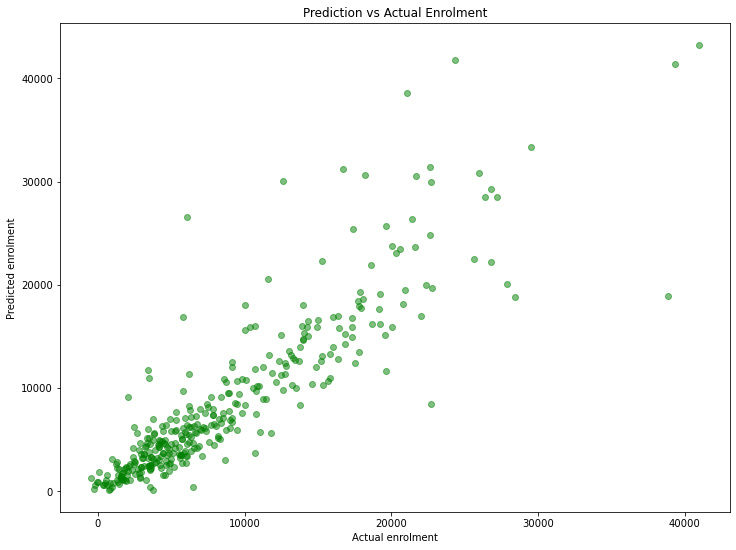

In [114]:
# Scatter plot for predicted vs Actual values
actual = y_test_final
plt.figure(figsize=(12,9))
plt.scatter(pred_final, actual, color='green', alpha=.5)
plt.ylabel('Predicted enrolment')
plt.xlabel('Actual enrolment')
plt.title('Prediction vs Actual Enrolment')
plt.show()

From the scatter plot, it is visible that mostly the predicted enrolment is lower than the actual enrolment. There is a difference in the actual and predicted values. But from the scatter plot linear regression model shows increase in dependent variables will lead to an increase in dependent variable (enrolment).